<a href="https://colab.research.google.com/github/NidhiChaurasia/Algo-Tree/blob/main/Image_to_Pencil_Sketch_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries -


OpenCV is the only library which is needed for the project.
We will also be using matplotlib library for some visualizations.

Method to do this project :- 

Step 1 - We need to read the image in RBG format and then convert it to a grayscale image. This will turn an image into a classic black and white photo.

Step 2 - Then the next thing to do is invert the grayscale image also called negative image, this will be our inverted grayscale image. Inversion can be used to enhance details. 

Step 3 - Then we can finally create the pencil sketch by mixing the grayscale image with the inverted blurry image.

Step 4 - This can be done by dividing the grayscale image by the inverted blurry image. Since images are just arrays, we can easily do this programmatically using the divide function from the cv2 library in Python.

In [2]:
import cv2
import matplotlib.pyplot as plt

Reading the image -
The following command can be used to read image using OpenCV.

This command reads the file mother-teresa-3.jpg located in the current folder and stores in memory as img.

In [3]:
img=cv2.imread("mother-teresa-3.jpg")

Displaying Image using OpenCV in Colab notebook but if someone is using jupyter then he can use the following code -

cv2.imshow(‘original image’,img)

cv2.waitKey(0)

cv2.destroyAllWindows()

When you will run this command in Jupyter notebook it is executed, and the below photo will open in a new window with title as ‘original image.’


In [12]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

The following command can be used to display cv2 image using matplotlib.

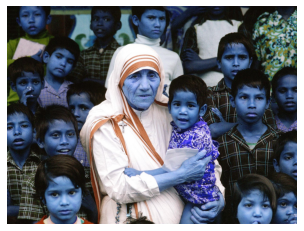

In [13]:
plt.imshow(img)
plt.axis(False)
plt.savefig('temp.png')
plt.show()

Matplotlib vs OpenCV

We can observe that the image displayed using matplotlib is not consistent with the original image.

This is because OpenCV uses BGR color scheme whereas matplotlib uses RGB colors scheme.

We can convert BGR image to RGB by using any of the following methods.

Convert BGR to RGB: Method 1

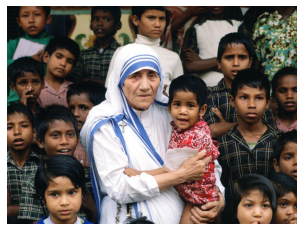

In [14]:
plt.imshow(img[:,:,::-1])
plt.axis(False)
plt.savefig('temp.png')
plt.show()

Method 2 : Convert BGR to RGB

Using cvtColor method of OpenCV.

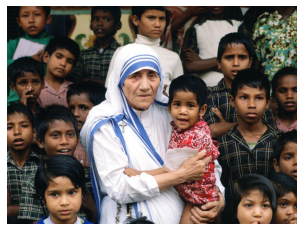

In [15]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.axis(False)
plt.savefig('temp.png')
plt.show()

Transform the Photo into a Pencil Sketch :

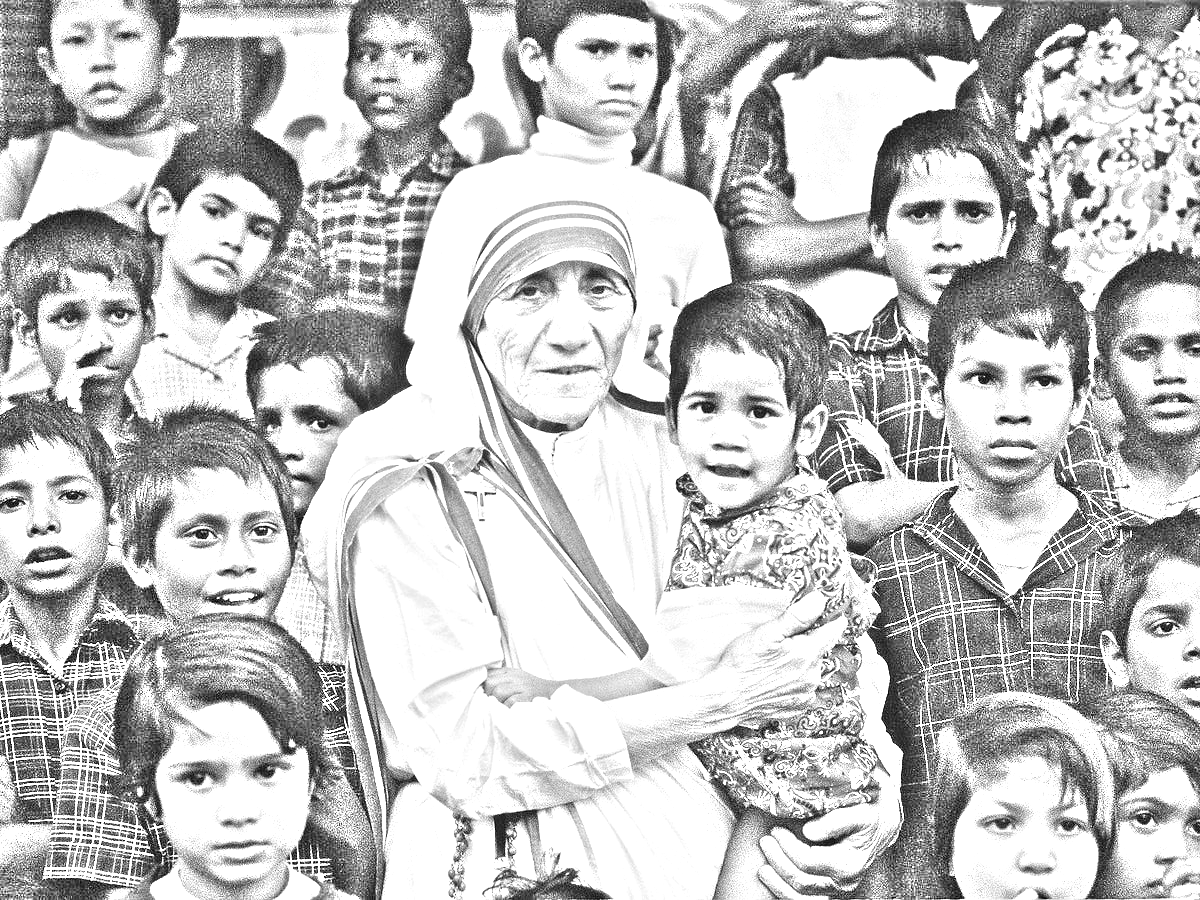

In [22]:
# Convert to Grey Image
grey_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Invert Image
invert_img=cv2.bitwise_not(grey_img)
#invert_img=255-grey_img

# Blur image
blur_img=cv2.GaussianBlur(invert_img, (111,111),0)

# Invert Blurred Image
invblur_img=cv2.bitwise_not(blur_img)
#invblur_img=255-blur_img

# Sketch Image
sketch_img=cv2.divide(grey_img,invblur_img, scale=256.0)

# Save Sketch 
cv2.imwrite('sketch.png', sketch_img)

# Display sketch
from google.colab.patches import cv2_imshow
cv2_imshow(sketch_img)

Original Image vs Sketch


Let's display the original image and sketch side by side for comparison.

In [27]:
plt.figure(figsize=(14,8))

plt.subplot(1,2,1)
plt.title('Mother Teresa with kids Original image', size=18)
plt.imshow(RGB_img)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Sketch of Mother Teresa', size=18)
rgb_sketch=cv2.cvtColor(sketch_img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_sketch)
plt.axis('off')
plt.savefig('temp1.png')
plt.show()

Creating our own  Sketch Function

We can combine everything together to create a sketch function:


In [41]:
def sketch_image(photo, k_size):
    #Read Image
    img = cv2.imread('mother-teresa-3.jpg')
    
    # Convert to Grey Image
    grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Invert Image
    invert_img=cv2.bitwise_not(grey_img)
    #invert_img=255-grey_img

    # Blur image
    blur_img=cv2.GaussianBlur(invert_img, (k_size,k_size),0)

    # Invert Blurred Image
    invblur_img=cv2.bitwise_not(blur_img)
    #invblur_img=255-blur_img

    # Sketch Image
    sketch_img=cv2.divide(grey_img,invblur_img, scale=256.0)

    # Save Sketch 
    cv2.imwrite('sketch.png', sketch_img)

    # Display sketch
    cv2_imshow(sketch_img)
    
#Function call
sketch_image(photo='image_1.png', k_size=7)